/Library/Python/2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Library/Python/2.7/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[<matplotlib.text.Text at 0x10984ac50>, <matplotlib.text.Text at 0x109791d10>]

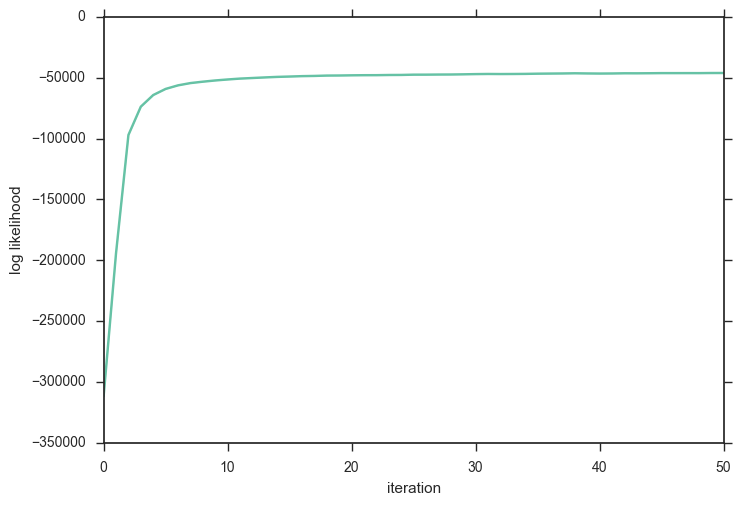

In [73]:
%matplotlib inline
import pandas as pd
trace = pd.read_csv("sampler.log", delimiter="\t", header=None)
trace.columns = ["time", "iter", "ll"]
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()
ax = sns.tsplot(trace["ll"])
ax.set(xlabel='iteration', ylabel='log likelihood')

In [78]:
model_legislator_index = pd.read_csv("model_legislator_index.df")
model_vote_index = pd.read_csv("model_vote_index.df")

In [62]:
import glob
import numpy as np
BURNIN = 30
files = glob.glob("trace/leg_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei["iter"] = iter_
            yield tracei

leg_traces = pd.concat(get_trace())
groupby_object = leg_traces.groupby(['legislator'])
leg_means = groupby_object.aggregate(np.mean)

leg_means = leg_means.sort(["theta"], ascending=False)

print leg_means.head(10)
#print leg_means.head()

def check():
    # 2x checking pandas....
    rr = pd.concat(get_trace())
    rr = rr.query("legislator==0")
    print rr["theta"].mean()


            Unnamed: 0     theta
legislator                      
527                498  1.778952
212                330  1.643264
83                 255  1.615087
456                373  1.601685
209                328  1.597966
311                388  1.597825
364                424  1.594268
398                334  1.590119
120                280  1.582638
46                 234  1.574525


/Library/Python/2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [124]:
import glob
BURNIN = 30
files = glob.glob("trace/votes_*")

def get_trace():
    for f in files:
        iter_ = f.split("_")[1]
        if int(iter_) > BURNIN:
            tracei = pd.read_csv(f, delimiter=",")#, header=None)
            tracei.columns=["ix", "vote", "alpha", "beta"]
            tracei["iter"] = iter_
            yield tracei

votes_trace = pd.concat(get_trace())
votes_trace.head()
votes_trace_groupby_object = votes_trace.groupby(['vote'])
vote_means = votes_trace_groupby_object.aggregate(np.mean)
model_vote_index.columns = ["ix", "real"] # assuming 1st column is index and second is real
votes = model_vote_index.merge(vote_means, on="ix")
votes.sort(["beta"])
vote_df.head()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Unnamed: 0,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,bill_title,bill_type,category,...,record_modified,requires,result,result_text,session,source_url,subject,type,updated_at,vote_id
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quorum,...,NaN,QUORUM,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll001.xml,NaN,Call of the House,2014-06-18T11:22:24-04:00,h1-113.2013
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,procedural,...,NaN,1/2,Failed,Failed,2013,http://clerk.house.gov/evs/2013/roll010.xml,NaN,On the Motion to Adjourn,2014-06-18T11:22:23-04:00,h10-113.2013
2,2,NaN,NaN,NaN,NaN,113.0,1120.0,NaN,hr,recommit,...,NaN,1/2,Failed,Failed,2013,http://clerk.house.gov/evs/2013/roll100.xml,Preventing Greater Uncertainty in Labor-Manage...,On the Motion to Recommit,2014-06-18T11:22:04-04:00,h100-113.2013
3,3,NaN,NaN,NaN,NaN,113.0,1120.0,NaN,hr,passage,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll101.xml,Preventing Greater Uncertainty in Labor-Manage...,On Passage of the Bill,2014-06-18T11:22:04-04:00,h101-113.2013
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,procedural,...,NaN,1/2,Passed,Passed,2013,http://clerk.house.gov/evs/2013/roll102.xml,NaN,On Approving the Journal,2014-06-18T11:22:04-04:00,h102-113.2013


In [97]:
vote_means.head()

# print vote_means.sort("beta", ascending=False).head()
# print vote_df.iloc[model_vote_index.iloc[335]]

,ix,alpha,beta
vote,,,
0,0,-0.125910,2.429981
1,1,-0.299793,-2.409005
2,2,2.690764,0.190097
3,3,2.346404,0.066662
4,4,0.642945,-1.467952


In [46]:
import ideal_point.raw_data
legislator_df = ideal_point.raw_data.legislators() # validation
print legislator_df.iloc[120]
print legislator_df.iloc[46]

last_name                                                       Edwards
first_name                                                        Donna
birthday                                                     1958-06-28
gender                                                                F
type                                                                rep
state                                                                MD
district                                                              4
party                                                          Democrat
url                                       http://donnaedwards.house.gov
address                      2445 Rayburn HOB; Washington DC 20515-2004
phone                                                      202-225-8699
contact_form          https://forms.house.gov/formdonnaedwards/issue...
rss_url                         http://www.house.gov/common/rss/?rss=24
twitter                                                 RepDonna